# Итоговая работа.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [20]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [118]:
def cosine( a, b ):
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    return np.dot( a, b ) / ( aLength * bLength )

In [119]:
user_similarity = {}
user_id = 0

In [120]:
for user_id in range(len(raitings)):
    for i in range(len(raitings)):
        user_sim = {}
        similarity = cosine(raitings[user_id], raitings[i])
        if i != user_id:
            user_sim[i] = similarity
        else:
            user_sim[i] = 0        
    s_user = max(user_sim, key=lambda key: user_sim[key])
    user_similarity[user_id] = s_user
print(user_similarity)

{0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9}


## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [21]:
import math
from sympy import *

In [22]:
x = symbols('x')
f = (tan(sin(x) + cos(2*x +3)))**2
f

tan(sin(x) + cos(2*x + 3))**2

In [23]:
df = diff(f,x)
df

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [24]:
f1 = df.subs(x,1).evalf()
print(f'Первая производная f(x) при x = 1 равна {f1}')

Первая производная f(x) при x = 1 равна 55.3859176353379


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [47]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [48]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [49]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

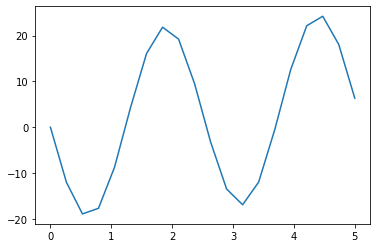

In [50]:
plt.plot(x, fx)
plt.show()

In [64]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Для минимизации функции потерь используем методом minimize

In [72]:
from scipy.optimize import minimize

In [84]:
params0 = np.array([1, 1])

In [85]:
res = minimize(error, params0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 109
         Function evaluations: 207


In [86]:
print(f'Оптимальные параметры: a = {res.x[0]}, b = {res.x[1]}')
print(f'Значение функции потерь error = {res.fun}')

Оптимальные параметры: a = 1.9528258541172778, b = 1.5662520794612407
Значение функции потерь error = 228.35671969694644


## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [28]:
rv = sts.expon(0.5)
x = rv.rvs(20)
x

array([0.55821417, 0.95014326, 0.66385555, 0.7452956 , 1.30809992,
       2.34327356, 1.36950924, 0.69434843, 6.96078521, 1.30835363,
       3.30541879, 1.13584741, 4.89746305, 0.90364805, 0.53518516,
       0.83079584, 1.10968609, 1.14602018, 0.76890364, 1.46517939])

In [29]:
n = 50
samples_count = 1000
a = np.array([])

for number in range(samples_count):
    sample = rv.rvs(size=n)
    a = np.append(a, sample.mean())


(0.0, 3.0)

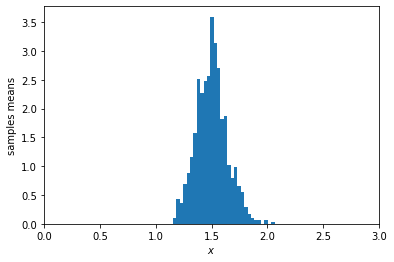

In [35]:
plt.hist(a, density=True, bins=30)
plt.ylabel('samples means')
plt.xlabel('$x$')
plt.xlim([0,3])

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [38]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [39]:
a,v = np.linalg.eig(m)

In [46]:
for i in range(len(a)):
    print (f'Собственное значение - {a[i]}')
    print (f'Собственный вектор - {v[:,i]}')

Собственное значение - 3.0000000000000004
Собственный вектор - [0.89442719 0.4472136 ]
Собственное значение - -0.9999999999999996
Собственный вектор - [-0.89442719  0.4472136 ]


### На бумаге

Для поиска собственных значений решим характеристическое уравнение  
m - aE = 0  
|1-a     4 |  
|1      1-a| = 0  
Определитель матрицы равен нулю, найдем альфа  
a^2 - 2*a - 3 = 0  
a1 = 3 , a2 = -1 - собственные значения


Для поиска собственных векторов решим систему уравнений для каждого a.  
a=3
-2x+4 = 0
x-2y = 0

y=x/2
{2,1} - первый собственный вектор

a=-1
2x+4 = 0
x+2y = 0

y=-x/2
{-2,1} - второй собственный вектор